# Calculating $\pi$ with Monte Carlo<span STYLE="color:blue">$^1$</span>

Imagine that you're stuck on a deserted island and need to calculate the value of $\pi$. In this lab, we will study an algorithm that will allow you to do this using nothing but sticks and rocks (or a Python random number generator).

First, take a straight stick of radius $r$ and spin it around in the sand to draw a circle of radius $r$. Then, draw a square of side length $2r$ centered at the same point as the circle. The square should just touch the edges, so that for $r=1$ the setup looks like the figure below

<span STYLE="color:blue">$^1$Written by Michael Wagman. Last updated 7/12/2021. </span>

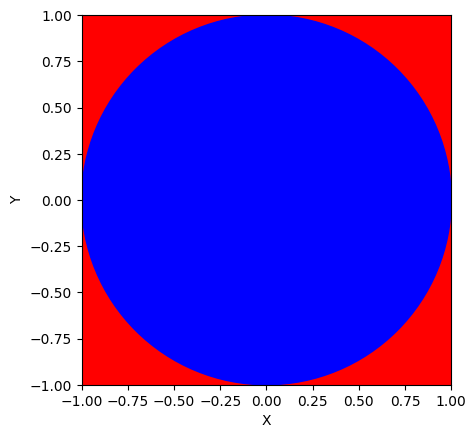

In [7]:
import matplotlib.pyplot as plt

rect1 = plt.Rectangle((-1, -1), 2, 2, color='r')
circle1 = plt.Circle((0, 0), 1, color='b')

fig,ax = plt.subplots(1,1)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_xlim(-1,1)
ax.set_ylim(-1,1)
ax.set_aspect('equal')

ax.add_patch(rect1)
ax.add_patch(circle1);

With this setup, the area of the square is $A_{square} = (2r)^2 = 4r^2$, while the area of the circle is $A_{circle} = \pi r^2$. This means that $\pi$ is related to the ratio of areas by
$$ \pi = 4 \left( \frac{A_{circle}}{A_{square}} \right) $$
Therefore all we need to calculate $\pi$ is a way to calculate the ratio of the area of the circle to the area of the square.

We can determine the ratio of areas by randomly dropping rocks throughout the square and then counting what fraction end up inside the circle. Assuming that we drops the rocks uniformly randomly throughout the square, the probability of finding a rock inside the circle, which we'll denote by $\mathcal{P}_{circle}$, is equal to the ratio of the areas
$$ \mathcal{P}_{circle} =  \frac{A_{circle}}{A_{square}}. $$
Putting these equations together gives $\pi = 4 \mathcal{P}_{circle}$, so we can determine $\pi$ if we can determine the probability of finding a rock inside the circle. To accomplish this last step, we simply count the number of rocks  that landed in the circle, $N_{circle}$, and take the ratio to the total number of rocks dropped, $N$.
In the limit of dropping infinitely many rocks,
$$ \mathcal{P}_{circle} = \lim_{N \rightarrow \infty} \frac{N_{circle}}{N}, $$
However, dropping infinitely many rocks is impractical, and in practice we'll have to stop at a finite value of $N$.
A powerful result from probability theory called the Central Limit Theorem says that stoping at finite $N$ introduces an approximation error that gets smaller as $N$ gets larger, in particular for large $N$ the approximation errors are proportional to $N^{-1/2}$. Therefore
$$ \mathcal{P}_{circle} =  \frac{N_{circle}}{N} + O(N^{-1/2}), $$
where $O(N^{-1/2})$ denotes our approximation error, which is unknown besides the fact that it must be proportional to $N^{-1/2}$. Because this approximation error is an intrinsic feature of our algorithm that we can't get rid of, we'll call it an uncertainty instead of an error. Because it gets smaller as the sample size $N$ (statistics) gets bigger, we'll often call it a ''statistical uncertainty.''


Monte Carlo algorithms use exactly the same principles, except that we replace dropping rocks in the sand with a Python random number generator that can create approximately uniformly distributed random numbers. This lab involves a Monte Carlo calculation of $\pi$ and determination of its statistical uncertainty.

In [10]:
import numpy as np


def draw_circle(Nsamples, makeplot=True):

    # create ensemble of random points inside square
    random_vars = np.random.uniform(-1,1, (Nsamples,2))

    # variables to store how many random points are inside vs outside the circle
    in_circle = 0
    out_circle = 0
    inpoints = []
    outpoints = []
    if makeplot:
        fig,ax = plt.subplots(1,1)
        ax.set_xlabel('X')
        ax.set_ylabel('Y')
        ax.set_xlim(-1,1)
        ax.set_ylim(-1,1)
        ax.set_aspect('equal')

    for ivar,var in enumerate(random_vars):
        rsq = var[0]**2 + var[1]**2
        if rsq <= 1:
#             if makeplot:
            inpoints.append(var)
#                 ax.scatter(var[0],var[1], color="blue", s=100/np.sqrt(Nsamples))
            in_circle = in_circle + 1
        else:
            outpoints.append(var)
#             ax.scatter(var[0],var[1], color="red", s=100/np.sqrt(Nsamples))
            out_circle = out_circle + 1

#     print(inpoints)
    ax.scatter(np.array(inpoints)[:, 0], np.array(inpoints)[:, 1],
               color=(0, 114/255, 178/255), s=100/np.sqrt(Nsamples))
    ax.scatter(np.array(outpoints)[:, 0], np.array(outpoints)[:, 1],
               color=(213/255, 94/255, 0), s=100/np.sqrt(Nsamples))
    if makeplot:
        plt.show()
    print("Points inside circle: ", in_circle)
    print("Points outside circle: ", out_circle)

    return in_circle

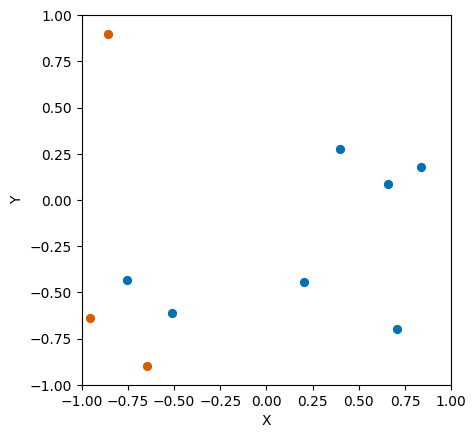

Points inside circle:  7
Points outside circle:  3


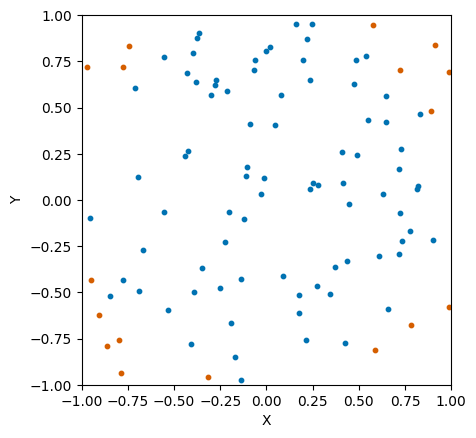

Points inside circle:  83
Points outside circle:  17


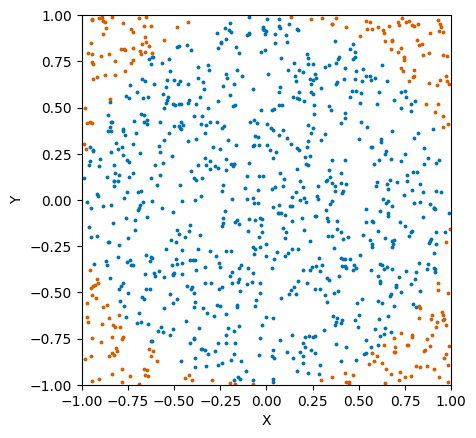

Points inside circle:  769
Points outside circle:  231


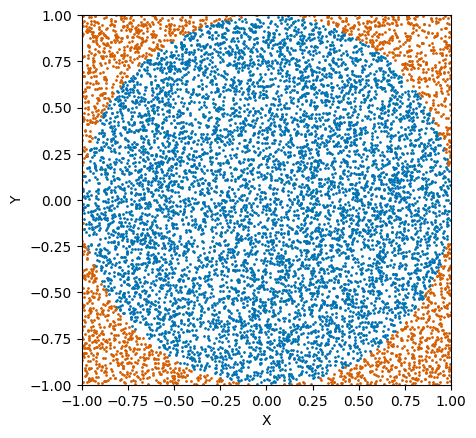

Points inside circle:  7889
Points outside circle:  2111


In [11]:
# this is not fast for j=4

N_list = [10**j for j in range(1,5)]

for N in N_list:
    draw_circle(N)

# Exercises


1. Use the draw_circle function to estimate $\pi$ using Monte Carlo ensembles of size $N \in \{10, 10^2, 10^3, 10^4\}$. Make a plot of your estimate vs $N$ and compare to ''exact'' results for $\pi$ (see the example plot function below).


2. A complete calculation should include an estimate of the statistical uncertainty in your estimate. One way to estimate the statistical uncertainty is to repeat all of the calculations in step 1 a large number of times, say $N_{replica} = 30$, and look at the results of the replica calculations An error bar usually signifies a ''68\% confidence interval,'' or in other words the error bar is supposed to span the results of 68\% of repetitions of the same numerical experiment.<span STYLE="color:blue">$^2$</span>  To calculate this confidence interval, you can sort your replica results and find the one that is the 5/6 of the way to largest (larger than 24 replicas and smaller than 4 for $N_{replica} = 30$) of the replicas and the one that is the 1/6 of the way to largest (larger than 4 replicas and smaller than 24 for $N_{replica} = 30$) of the replicas. The interval between these two replicas includes 2/3 of the replicas, so we can use it as our estimate of the 68\% confidence interval. In practice you don't have to explicitly sort your lists, NumPy has a function called ''quantile'' that takes a list and a fraction as arguments and returns the list element that is that fraction of way to largest, so the easy way is to use np.quantile(your_list, 5/6) and np.quantile(your_list, 1/6). Since this is $N_{replica}$ times slower than part 1, only use $N \in \{10, 10^2, 10^3 \}$ for this section.


3. The replica method always works,<span STYLE="color:blue">$^3$</span> but there are easier ways to estimate confidence intervals without repeating your entire calculation many times. The easiest method is to appeal to the Central Limit Theorem again, which in addition to telling us that our statistical uncertainties are proportional to $N^{-1/2}$ also tells us that they are Guassian distributed with a width equal to the ''standard deviation'' of the underlying random variable divided by $\sqrt{N}$ (formula below). For Gaussian distributions, the width / standard deviation of a Guassian (or $1\sigma$ region) coincides with the region containing 68\% of the probability distribution, which is precisely the 68\% confidence interval we're looking for. Therefore if we have $N$ samples of a random variable $p$, we can estimate 68\% confidence intervals as equal to the standard deviations divided by $1/\sqrt{N}$,
$$ \delta p = \frac{1}{\sqrt{N}} \sqrt{\frac{1}{N} \sum_{i = 1}^N  p_i^2 - \left( \frac{1}{N} \sum_{i = 1}^N p_i \right)^2 } $$
Calculate 68\% confidence intervals by applying this formula to your original MC ensembles (we can ignore the replicas in this section and use all $N \in \{10, 10^2, 10^3, 10^4\}$). How well do these results agree with the replica estimate in part 2? Does the statistical uncertainty of your Monte Carlo results explain their differences with exact results?


<span STYLE="color:blue">$^2$Plotting 68\% ($1\sigma$) error bars is just a convention. It's a standard convention in physics, but it's good practice to explicitly say what confidence intervals your error bars are in the captions to figures. There are times where 95\% ($2\sigma$) confidence intervals or even 0.9999994\% ($5\sigma$) confidence intervals are useful. </span>

<span STYLE="color:blue">$^3$A similar but more efficient version of the replica method called the ''bootstrap method'' also always works and is verfy useful for determining the statistical uncertainties of complicated functions of random data. We won't need it here. </span>

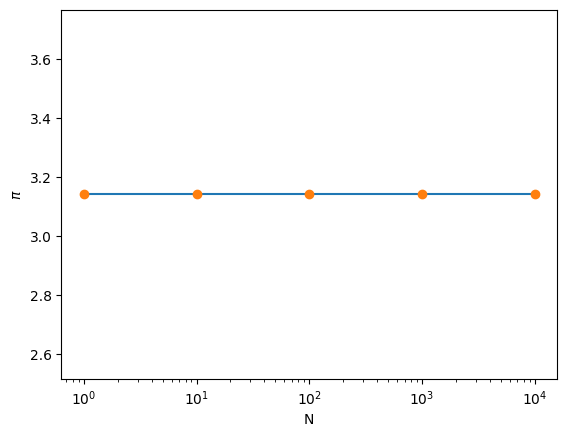

In [4]:
# create figure, label axes
fig, ax = plt.subplots()
plt.xlabel('N')
plt.ylabel('$\pi$')

# Monte Carlo ensemble sizes
N_list = [10**j for j in range(0,5)]

# exact value for comparison
pi_list = [np.pi for j in range(0,5)]

# replace this with your actual Monte Carlo results
MC_pi_list = [np.pi for j in range(0,5)]

# replace this with your actual Monte Carlo errors
MC_pi_errors = [0 for j in range(0,5)]

# for easy visibility over many orders of magnitude of N
ax.set_xscale("log")
ax.set_ylim(.8*np.pi, 1.2*np.pi)

# draw exact results line
ax.plot(N_list, pi_list)

# draw points with error bars for Monte Carlo results
ax.errorbar(N_list, MC_pi_list, yerr=MC_pi_errors, fmt='o');